# <b><span style='color:#F1A424'>AutoML - Regression - Advertisment Sales Prediction </span> </b>

### Disclaimer
Please note, the Vantage Functions via SQLAlchemy feature is a preview/beta code release with limited functionality (the “Code”). As such, you acknowledge that the Code is experimental in nature and that the Code is provided “AS IS” and may not be functional on any machine or in any environment. TERADATA DISCLAIMS ALL WARRANTIES RELATING TO THE CODE, EXPRESS OR IMPLIED, INCLUDING, BUT NOT LIMITED TO, ANY WARRANTIES AGAINST INFRINGEMENT OF THIRD-PARTY RIGHTS, MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE.

TERADATA SHALL NOT BE RESPONSIBLE OR LIABLE WITH RESPECT TO ANY SUBJECT MATTER OF THE CODE UNDER ANY CONTRACT, NEGLIGENCE, STRICT LIABILITY OR OTHER THEORY 
    (A) FOR LOSS OR INACCURACY OF DATA OR COST OF PROCUREMENT OF SUBSTITUTE GOODS, SERVICES OR TECHNOLOGY, OR 
    (B) FOR ANY INDIRECT, INCIDENTAL OR CONSEQUENTIAL DAMAGES INCLUDING, BUT NOT LIMITED TO LOSS OF REVENUES AND LOSS OF PROFITS. TERADATA SHALL NOT BE RESPONSIBLE FOR ANY MATTER BEYOND ITS REASONABLE CONTROL.

Notwithstanding anything to the contrary: 
    (a) Teradata will have no obligation of any kind with respect to any Code-related comments, suggestions, design changes or improvements that you elect to provide to Teradata in either verbal or written form (collectively, “Feedback”), and 
    (b) Teradata and its affiliates are hereby free to use any ideas, concepts, know-how or techniques, in whole or in part, contained in Feedback: 
        (i) for any purpose whatsoever, including developing, manufacturing, and/or marketing products and/or services incorporating Feedback in whole or in part, and 
        (ii) without any restrictions or limitations, including requiring the payment of any license fees, royalties, or other consideration. 

## <b> Problem overview:</b>
    

**Dataset Used : Advertising Sales Dataset**

**Features**:

- `TV`: Advertising done on TV.
- `Radio`: Advertising done on Radio.
- `Newspapaer`: Advertising done on Newspaper.

**Target Variable**:

- `Sales`: The Sales received after advertisement.
    
**Objective**:

The primary objective is typically to build a model that can accurately predict sales received based on advertisement.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in auto run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','advertising')

In [5]:
# Fetching in teradata dataframe
advertising_df = DataFrame("advertising")

In [6]:
# first 5 rows
advertising_df.head()

TV,radio,newspaper,sales
5.4,29.9,9.4,5.3
7.8,38.9,50.6,6.6
8.4,27.2,2.1,5.7
8.6,2.1,1.0,4.8
11.7,36.9,45.2,7.3
13.1,0.4,25.6,5.3
8.7,48.9,75.0,7.2
7.3,28.1,41.4,5.5
4.1,11.6,5.7,3.2
0.7,39.6,8.7,1.6


In [7]:
# advertising_df dataset
advertising_df.shape

(200, 4)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
advertising_df_sample = advertising_df.sample(frac = [0.8, 0.2])

In [9]:
advertising_df_sample.head()

TV,radio,newspaper,sales,sampleid
5.4,29.9,9.4,5.3,2
7.8,38.9,50.6,6.6,1
8.4,27.2,2.1,5.7,1
8.6,2.1,1.0,4.8,1
11.7,36.9,45.2,7.3,1
13.1,0.4,25.6,5.3,1
8.7,48.9,75.0,7.2,1
7.3,28.1,41.4,5.5,1
4.1,11.6,5.7,3.2,1
0.7,39.6,8.7,1.6,1


In [10]:
# Fetching train and test data
advertising_df_train= advertising_df_sample[advertising_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
advertising_df_test = advertising_df_sample[advertising_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
advertising_df_train.shape

(160, 4)

In [12]:
# test data shape
advertising_df_test.shape

(40, 4)

In [13]:
#train dataset
advertising_df_train.head()

TV,radio,newspaper,sales
7.3,28.1,41.4,5.5
8.4,27.2,2.1,5.7
8.6,2.1,1.0,4.8
8.7,48.9,75.0,7.2
13.1,0.4,25.6,5.3
13.2,15.9,49.6,5.6
11.7,36.9,45.2,7.3
7.8,38.9,50.6,6.6
4.1,11.6,5.7,3.2
0.7,39.6,8.7,1.6


In [14]:
# test dataset
advertising_df_test.head()

TV,radio,newspaper,sales
26.8,33.0,19.3,8.8
50.0,11.6,18.4,8.4
56.2,5.7,29.7,8.7
62.3,12.6,18.3,9.7
69.0,9.3,0.9,11.3
74.7,49.4,45.7,14.7
66.9,11.7,36.8,9.7
44.7,25.8,20.6,10.1
25.1,25.7,43.3,8.5
5.4,29.9,9.4,5.3


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [15]:
# Creating AutoRegressor instance
# Using all models from model training.
# Keeping early stopping timer threshold to 300 sec and max_models to 8
# and verbose level 2 for detailed loggging

aml = AutoRegressor(max_runtime_secs=300,
                    max_models=8,
                    verbose=2)

Feature Exploration started ...

Data Overview:
Total Rows in the data: 160
Total Columns in the data: 4

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
TV,FLOAT,160,0,None,0,160,0,0.0,100.0
sales,FLOAT,160,0,None,0,160,0,0.0,100.0
newspaper,FLOAT,160,0,None,0,160,0,0.0,100.0
radio,FLOAT,160,0,None,1,159,0,0.0,100.0


            TV    radio  newspaper    sales
func                                       
std     87.602   15.027     22.265    5.430
25%     72.700    9.825     11.825   10.900
50%    150.650   22.400     25.750   16.000
75%    218.825   36.825     43.675   19.050
max    296.400   49.600    114.000   27.000
min      0.700    0.000      0.300    1.600
mean   147.039   23.412     30.391   15.122
count  160.000  160.000    160.000  160.000

Statistics of Data:


func,TV,radio,newspaper,sales
std,87.602,15.027,22.265,5.43
25%,72.7,9.825,11.825,10.9
50%,150.65,22.4,25.75,16
75%,218.825,36.825,43.675,19.05
max,296.4,49.6,114,27
min,0.7,0,0.3,1.6
mean,147.039,23.412,30.391,15.122
count,160,160,160,160



Target Column Distribution:


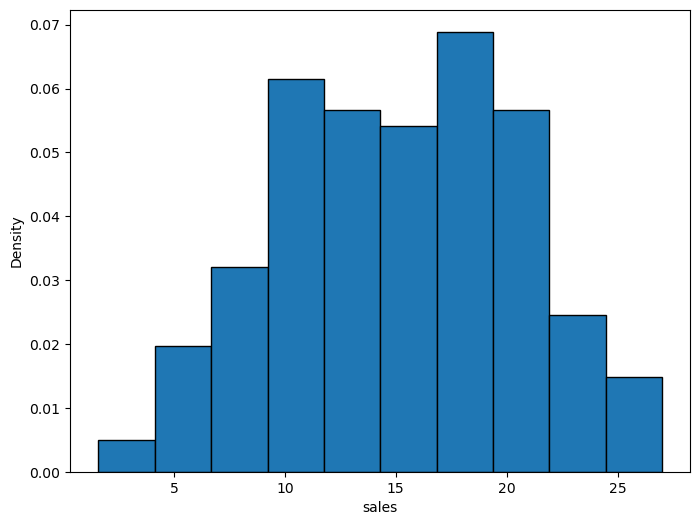

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0  newspaper               1.25


Analysis completed. No action taken.                                                    


Analysis Completed. Dataset does not contain any feature related to dates. No action needed.


Analysis Completed. No Missing Values Detected.                                          


Analysis completed. No imputation required.                                              


Analysis completed. No categorical columns were found.                                   


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0  newspaper               1.25


['newspaper']


TV,radio,newspaper,sales,id
149.7,35.6,6.0,17.3,12
18.8,21.7,50.4,7.0,11
276.7,2.3,23.7,16.8,19
43.1,26.7,35.1,10.1,8
255.4,26.9,5.5,19.8,14
38.2,3.7,13.8,7.6,22
239.9,41.5,18.5,23.2,13
227.2,15.8,49.9,19.8,21
218.5,5.4,27.4,17.2,15
94.2,4.9,8.1,14.0,23


['TV', 'radio', 'newspaper']


['TV', 'radio', 'newspaper']


sales,id,TV,radio,newspaper
18.4,10,0.7381835376114487,0.4168342943763467,-0.9789379836284258
17.3,12,0.03575546902357379,0.8234586799228274,-1.1395377774311637
23.2,13,1.0744277933944972,1.2167511184022102,-0.5312052251480658
19.8,14,1.2529136141012525,0.24351898250407616,-1.1638710795224876
19.7,16,0.47563665295893176,-0.4030804502501635,-0.5604051876576546
9.5,17,-1.3932826180543816,1.0501017800634886,-0.9789379836284258
17.2,15,0.8280022086767838,-1.1896653272089293,-0.09807244792250025
7.0,11,-1.471586074880571,-0.10311164124046465,1.0212594482783997
24.7,9,0.8487295943072457,1.716699133418375,-1.2758042691425775
10.1,8,-1.1917663688693356,0.2301870354369785,0.2766604042838881


['TV', 'radio']


['r_TV', 'r_radio']


sales,id,r_TV,r_radio
18.4,10,0.7381835376114487,0.4168342943763467
17.3,12,0.03575546902357379,0.8234586799228274
23.2,13,1.0744277933944972,1.2167511184022102
19.8,14,1.2529136141012525,0.24351898250407616
19.7,16,0.47563665295893176,-0.4030804502501635
9.5,17,-1.3932826180543816,1.0501017800634886
17.2,15,0.8280022086767838,-1.1896653272089293
7.0,11,-1.471586074880571,-0.10311164124046465
24.7,9,0.8487295943072457,1.716699133418375
10.1,8,-1.1917663688693356,0.2301870354369785


['TV', 'radio', 'newspaper']


sales,id,TV,radio,newspaper
17.2,15,0.8280022086767849,-1.1896653272089288,-0.09807244792250025
18.4,10,0.7381835376114498,0.41683429437634634,-0.9789379836284258
10.8,18,-1.2332211401302584,1.1900872242680143,-1.149271098267693
7.0,11,-1.4715860748805702,-0.10311164124046485,1.0212594482783997
23.2,13,1.0744277933944986,1.2167511184022095,-0.5312052251480658
19.8,21,0.9281845725573505,-0.4964040797198475,0.9969261461870758
19.8,14,1.2529136141012536,0.24351898250407586,-1.1638710795224876
7.6,22,-1.2481909186411475,-1.3029868772792597,-0.7599382648065105
17.3,12,0.03575546902357477,0.823458679922827,-1.1395377774311637
5.7,20,-1.5913443029676833,0.2635169031047225,-1.32933753374349


['col_0', 'col_1', 'col_2']


response_column : sales                                                                                                                               
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
num_trees : (-1, 10, 20)
seed : 42
Total number of models for decision_forest : 48
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : sales
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.2)
max_depth : (5, 6, 7, 8)
min_node_size : (1, 2)
iter_num : (10, 20)
seed : 42
Total number of models for xgboost : 768
-------------------------------------------------------------------------------------------------------------------------------------------------

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,KNN_1,rfe,1.055790,2.023639,0.009446,7.151976,2.392202,1.422547,0.097189,4.203217,0.922555,0.927300,0.149030,0.011623,0.921555
1,2,GLM_1,rfe,1.229208,2.311243,0.011298,8.779032,-0.090825,1.520277,0.106292,3.139551,0.911548,0.912892,0.164516,0.013240,0.910406
2,3,DECISIONFOREST_1,rfe,1.529687,3.415041,0.017554,11.224770,-2.792731,1.847983,0.132491,3.880000,0.869305,0.869330,0.250371,0.020938,0.867619
3,4,GLM_2,pca,1.647833,4.197219,0.019330,12.127324,-3.956709,2.048712,0.139032,4.823611,0.839371,0.839389,0.281034,0.021870,0.836242
4,5,XGBOOST_2,pca,1.594226,4.208329,0.019006,10.414319,2.439263,2.051421,0.137864,5.575339,0.838945,0.846603,0.293122,0.024563,0.835808
5,6,SVM_2,pca,1.719796,4.371814,0.015838,11.118059,-1.933912,2.090888,0.125850,5.371160,0.832689,0.842874,0.266629,0.018849,0.829430
6,7,DECISIONFOREST_2,pca,1.728646,5.222329,0.020647,11.687600,0.109286,2.285242,0.143692,5.575000,0.800139,0.812442,0.334104,0.024520,0.796246
7,8,DECISIONFOREST_0,lasso,1.970828,5.551455,0.023930,14.075638,-3.763811,2.356153,0.154693,5.338000,0.787544,0.787741,0.362873,0.027342,0.783405


In [16]:
# Fitting train data
aml.fit(advertising_df_train, advertising_df_train.sales)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [17]:
# Fetching Leaderboard
aml.leaderboard()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,KNN_1,rfe,1.055790,2.023639,0.009446,7.151976,2.392202,1.422547,0.097189,4.203217,0.922555,0.927300,0.149030,0.011623,0.921555
1,2,GLM_1,rfe,1.229208,2.311243,0.011298,8.779032,-0.090825,1.520277,0.106292,3.139551,0.911548,0.912892,0.164516,0.013240,0.910406
2,3,DECISIONFOREST_1,rfe,1.529687,3.415041,0.017554,11.224770,-2.792731,1.847983,0.132491,3.880000,0.869305,0.869330,0.250371,0.020938,0.867619
3,4,GLM_2,pca,1.647833,4.197219,0.019330,12.127324,-3.956709,2.048712,0.139032,4.823611,0.839371,0.839389,0.281034,0.021870,0.836242
4,5,XGBOOST_2,pca,1.594226,4.208329,0.019006,10.414319,2.439263,2.051421,0.137864,5.575339,0.838945,0.846603,0.293122,0.024563,0.835808
5,6,SVM_2,pca,1.719796,4.371814,0.015838,11.118059,-1.933912,2.090888,0.125850,5.371160,0.832689,0.842874,0.266629,0.018849,0.829430
6,7,DECISIONFOREST_2,pca,1.728646,5.222329,0.020647,11.687600,0.109286,2.285242,0.143692,5.575000,0.800139,0.812442,0.334104,0.024520,0.796246
7,8,DECISIONFOREST_0,lasso,1.970828,5.551455,0.023930,14.075638,-3.763811,2.356153,0.154693,5.338000,0.787544,0.787741,0.362873,0.027342,0.783405


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [18]:
# Fetching best performing model for dataset
aml.leader()

,RANK,MODEL_ID,FEATURE_SELECTION,MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD,ADJUSTED_R2
0,1,KNN_1,rfe,1.05579,2.023639,0.009446,7.151976,2.392202,1.422547,0.097189,4.203217,0.922555,0.9273,0.14903,0.011623,0.921555


## <b><span style='color:#F1A424'>| 5.</span> Get Hyperparameter for Trained Model : </b>

In [19]:
aml.model_hyperparameters(rank=1)

{'response_column': 'sales',
 'name': 'knn',
 'model_type': 'Regression',
 'k': 5,
 'id_column': 'id',
 'voting_weight': 1.0,
 'persist': False,
 'max_models': 1}

In [20]:
aml.model_hyperparameters(rank=6)

{'response_column': 'sales',
 'name': 'svm',
 'model_type': 'regression',
 'lambda1': 0.1,
 'alpha': 0.85,
 'tolerance': 0.01,
 'learning_rate': 'Invtime',
 'initial_eta': 0.1,
 'momentum': 0.95,
 'nesterov': True,
 'intercept': True,
 'iter_num_no_change': 5,
 'local_sgd_iterations ': 10,
 'iter_max': 300,
 'batch_size': 20,
 'persist': False,
 'max_models': 1}

## <b><span style='color:#F1A424'>| 6.</span> Generate Prediction and Performance Metrics : </b>

In [21]:
# Generating prediction on test data
prediction = aml.predict(advertising_df_test)

Data Transformation started ...


id,TV,radio,newspaper,sales
26,90.4,0.3,23.2,12.0
17,97.5,7.6,7.2,13.7
34,193.2,18.4,65.7,20.2
50,44.7,25.8,20.6,10.1
36,74.7,49.4,45.7,14.7
40,26.8,33.0,19.3,8.8
22,184.9,43.9,1.7,20.7
15,163.3,31.6,52.9,16.9
32,116.0,7.7,23.1,11.0
19,215.4,23.6,57.6,17.1


sales,id,TV,radio,newspaper
17.1,19,0.7923050445354327,0.02354185589696389,1.3716589983934642
13.7,17,-0.5653387142598207,-1.0430139094708544,-1.0811378524119863
20.2,34,0.5366672884264027,-0.3230887678475772,1.7658584922729115
17.4,38,0.7842443945680307,0.05020575003115925,-1.2368709857964593
15.6,61,0.6126677024047632,-1.3763125861482972,-0.3998053938549167
14.7,36,-0.8278855989123379,1.7433630275525702,0.7925264086199552
10.1,50,-1.1733420260867027,0.17019327363503883,-0.4290053563645053
16.9,15,0.19236238267595274,0.556819738580873,1.1429259587350191
11.0,32,-0.35230725083562914,-1.0363479359373053,-0.30733884590788574
8.8,40,-1.379464360967407,0.650143368050557,-0.4922719418019475


id,TV,radio,sales
38,214.7,24.0,17.4
19,215.4,23.6,17.1
53,75.1,35.0,12.6
40,26.8,33.0,8.8
61,199.8,2.6,15.6
36,74.7,49.4,14.7
50,44.7,25.8,10.1
26,90.4,0.3,12.0
20,262.7,28.8,20.2
15,163.3,31.6,16.9


sales,id,r_TV,r_radio
10.1,50,-1.1733420260867027,0.17019327363503883
20.7,22,0.4410910102414953,1.376734483207383
12.0,26,-0.6470967353577537,-1.5296299774199211
20.2,20,1.3369746780470142,0.37017247964150474
8.4,12,-1.1123113906192317,-0.7763749681288997
17.1,19,0.7923050445354327,0.02354185589696389
12.6,53,-0.8232795132166798,0.7834628387215342
15.6,61,0.6126677024047632,-1.3763125861482972
14.7,36,-0.8278855989123379,1.7433630275525702
16.9,15,0.19236238267595274,0.556819738580873


sales,id,TV,radio,newspaper
8.4,12,-1.1123113906192308,-0.7763749681288997,-0.5360718855663307
12.6,53,-0.8232795132166789,0.7834628387215337,1.1331926378984898
16.9,15,0.19236238267595374,0.5568197385808725,1.1429259587350191
11.0,32,-0.3523072508356282,-1.0363479359373053,-0.30733884590788574
14.7,36,-0.827885598912337,1.7433630275525696,0.7925264086199552
12.0,26,-0.6470967353577528,-1.529629977419921,-0.30247218548962107
20.2,20,1.3369746780470155,0.37017247964150435,-0.6577383960229501
13.7,17,-0.5653387142598199,-1.0430139094708542,-1.0811378524119863
20.2,34,0.5366672884264038,-0.3230887678475773,1.7658584922729115
8.8,40,-1.3794643609674062,0.6501433680505564,-0.4922719418019475


C:\ProgramData\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


,id,col_0,col_1,col_2,sales
0,26,-1.357221,0.590556,0.811902,12.0
1,17,-1.550588,0.408650,-0.070888,13.7
2,40,-0.022315,1.305557,-0.928958,8.8
3,19,1.056096,-0.601551,1.016143,17.1
4,38,-0.752983,-0.942275,-0.832192,17.4
5,50,-0.296741,1.106535,-0.526563,10.1
6,61,-1.191921,-0.669852,0.748375,15.6
7,15,1.213199,-0.034030,0.424642,16.9
8,20,-0.066297,-1.410422,-0.602879,20.2
9,34,1.061835,-0.297816,1.514750,20.2


Data Transformation completed.⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿⫿｜ 100% - 10/10           

Following model is being picked for evaluation:
Model ID : KNN_1 
Feature Selection Method : rfe

Prediction : 
   id  prediction  sales
0  50    9.812579   10.1
1  31   21.510660   22.1
2   9    6.768630    5.3
3  11   10.079512    9.7
4  19   18.220002   17.1
5  12    9.065966    8.4
6  29   15.395922   15.0
7  22   20.321686   20.7
8  27   17.052169   17.3
9  10   16.157814   15.0


In [22]:
# Printing prediction
prediction.head()

id,prediction,sales
10,16.157814111588326,15.0
12,9.0659655106987,8.4
13,19.13738291457226,19.8
14,14.705908499739252,16.7
16,25.001314655214472,25.4
17,11.504256988260126,13.7
15,17.509759880137405,16.9
11,10.079512321579701,9.7
9,6.768630177714757,5.3
8,11.54693435338136,12.3


In [23]:
# Fetching performance metrics on test data
performance_metrics = aml.evaluate(advertising_df_test)


Skipping data transformation as data is already transformed.

Following model is being picked for evaluation:
Model ID : KNN_1 
Feature Selection Method : rfe

Performance Metrics : 
        MAE       MSE      MSLE      MAPE       MPE      RMSE     RMSLE        ME        R2        EV       MPD       MGD
0  0.769864  1.211314  0.005557  5.740164 -1.300162  1.100597  0.074542  3.659037  0.944181  0.944228  0.083424  0.006497


In [24]:
performance_metrics

MAE,MSE,MSLE,MAPE,MPE,RMSE,RMSLE,ME,R2,EV,MPD,MGD
0.7698635441558909,1.211313586316475,0.005556527656556923,5.7401637875750335,-1.3001624758960495,1.1005969227271513,0.07454212001651767,3.659037020496342,0.9441812677759833,0.9442278396368365,0.0834239773247259,0.006497375514069148


## <b><span style='color:#F1A424'>| 7.</span> Deploy Trained Model : </b>

#### 7.1. Deploy top 5 models

In [25]:
aml.deploy(table_name='Advertising_top_5_models', top_n=5)

Model Deployment Completed Successfully.


#### 7.2. Deploy models using list of model ranks

In [26]:
aml.deploy(table_name='Advertising_mixed_models', ranks=[2, 4, 5])

Model Deployment Completed Successfully.


#### 7.3. Deploy models using range of model rank

In [27]:
aml.deploy(table_name='Advertising_range_models', ranks=range(2,7))

Model Deployment Completed Successfully.


##### Note: 
 - After deployment, saved models can be loaded in same session or different session using table name. After loading models can be used for predict and evaluate. Please refer to notebook: `Regression__Advertisment_Sales_Prediction_Load_Models` for more details.

In [28]:
remove_context()

True